# Comparison

<br/>
<div class="alert alert-block alert-warning" style="padding:1em">
<b>Compare two GPS track:</b> to be continued</div>

## Let's start by defining our environment

The first task is only useful for the online notebook

In [1]:
import os
import sys

# Import de tracklib
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The following imports are necessary for all of the examples.

In [2]:
# Matplotlib to create visualizations
import matplotlib.pyplot as plt

# Import tracklib library
import tracklib as tkl

On charge les traces

(-1.0, 5.5)

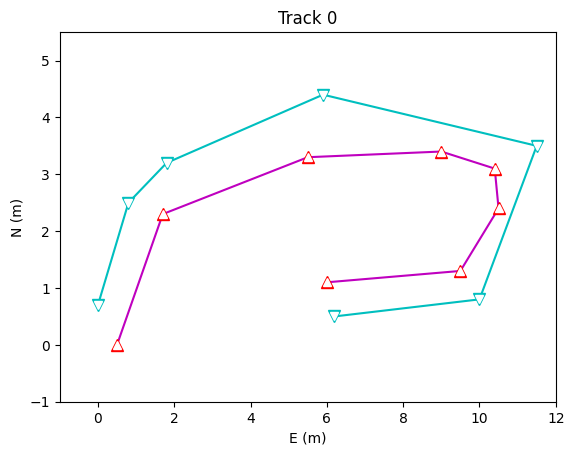

In [3]:
tkl.ObsTime.setReadFormat("4Y-2M-2D 2h:2m:2s")

chemin1 = '../../../test/data/compare/dtw1.csv'
trace1 = tkl.TrackReader.readFromCsv(chemin1, 0, 1, 2, 3, separator=",",read_all=True, h=1)
trace1gr = trace1.copy()
trace1gr.plot('m-')
trace1.plotAsMarkers(type=tkl.MARKERS_TYPE_WARNING)

chemin2 = '../../../test/data/compare/dtw2.csv'
trace2 = tkl.TrackReader.readFromCsv(chemin2, 0, 1, 2, 3, separator=",",read_all=True, h=1)
trace2.plot('c-')
trace2.plotAsMarkers(bkg='w', frg='c', sym_frg = " ", sym_bkg = "v")

plt.xlim([-1, 12])
plt.ylim([-1, 5.5])

### Profile of difference between two traces

with DTW (Dynamic Time Warping) method

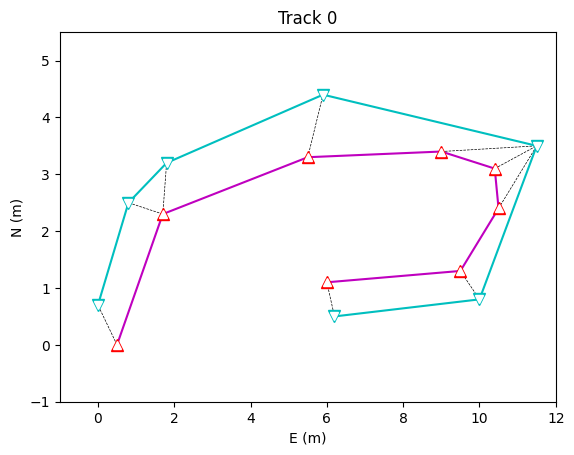

In [4]:
mode = tkl.MODE_MATCHING_DTW
p = 2
dim = 2

profile = tkl.match(trace1, trace2, mode=mode, p=p, dim=dim, verbose=False, plot=False)
tkl.plotMatching(profile, trace2)

trace1gr.plot('m-')
trace1.plotAsMarkers(type=tkl.MARKERS_TYPE_WARNING)
trace2.plot('c-')
trace2.plotAsMarkers(bkg='w', frg='c', sym_frg = " ", sym_bkg = "v")

plt.xlim([-1, 12])
plt.ylim([-1, 5.5])
plt.show()

### Computes central track of a track collection

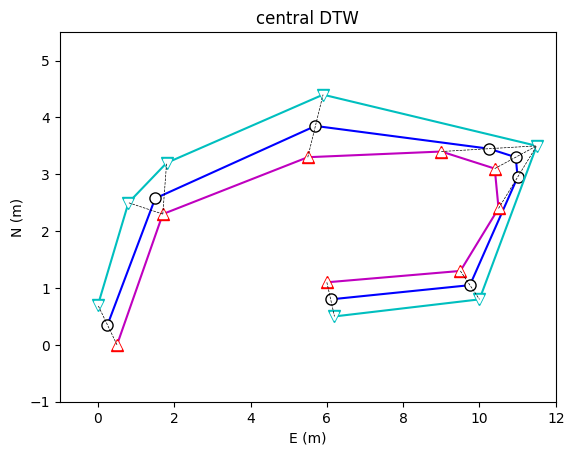

In [5]:
collection = tkl.TrackCollection([trace1, trace2])
central = tkl.fusion(collection, 
                     mode=mode, 
                     ref=0, p=p, dim=dim,
                     represent_method=tkl.MODE_BARYCENTRE,
                     constraint=False, 
                     verbose=False, plot=False)
        
central.plot('b--', append=True, pointsize=1.0)
central.plotAsMarkers(frg="k", bkg="w", sym_frg=" ", sym_bkg="o")

trace1gr.plot('m-')
trace1.plotAsMarkers(type=tkl.MARKERS_TYPE_WARNING)
trace2.plot('c-')
trace2.plotAsMarkers(bkg='w', frg='c', sym_frg = " ", sym_bkg = "v")

tkl.plotMatching(profile, trace2)

plt.title('central DTW')
plt.xlim([-1, 12])
plt.ylim([-1, 5.5])
plt.show()   